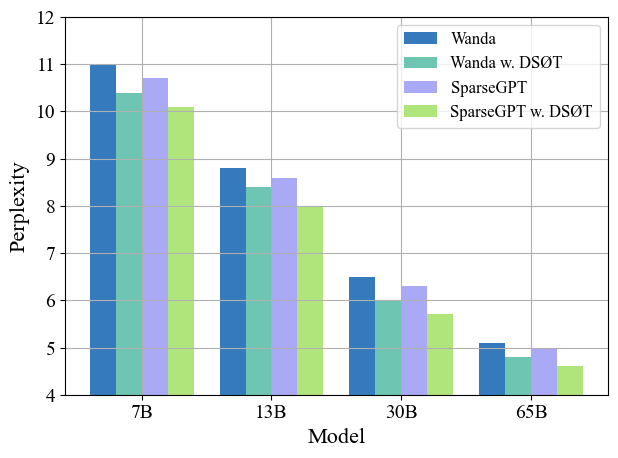

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 设置全局字体样式
plt.rcParams['font.family'] = 'Times New Roman'  # 使用 Arial 字体
plt.rcParams['font.size'] = 14         # 设置全局字体大小
plt.rcParams['axes.titlesize'] = 14    # 设置标题字体大小
plt.rcParams['axes.labelsize'] = 16    # 设置坐标轴标签字体大小
plt.rcParams['legend.fontsize'] = 12   # 设置图例字体大小
plt.rcParams['xtick.labelsize'] = 14   # 设置 x 轴刻度字体大小
plt.rcParams['ytick.labelsize'] = 14   # 设置 y 轴刻度字体大小

models = ['7B', '13B', '30B', '65B']
bar_width = 0.2
x = np.arange(len(models))

wanda = [11.0, 8.8, 6.5, 5.1]
wanda_dsot = [10.4, 8.4, 6.0, 4.8]
sparsegpt = [10.7, 8.6, 6.3, 5.0]
sparsegpt_dsot = [10.1, 8.0, 5.7, 4.6]

fig, ax = plt.subplots()
ax.bar(x - 1.5*bar_width, wanda, width=bar_width, label='Wanda', color='#357ABD')
ax.bar(x - 0.5*bar_width, wanda_dsot, width=bar_width, label='Wanda w. DSØT', color='#6EC6B2')
ax.bar(x + 0.5*bar_width, sparsegpt, width=bar_width, label='SparseGPT', color='#A9A9F5')
ax.bar(x + 1.5*bar_width, sparsegpt_dsot, width=bar_width, label='SparseGPT w. DSØT', color='#B0E57C')

ax.set_ylabel("Perplexity")
ax.set_xlabel("Model")
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.set_ylim(4, 12)
ax.legend( bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.grid()
plt.show()


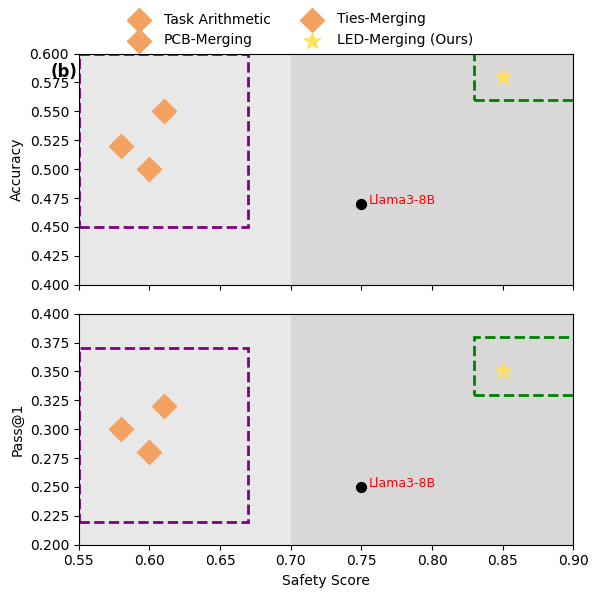

In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# 方法名称和数据（伪造用于演示）
methods = ["Task Arithmetic", "PCB-Merging", "Ties-Merging", "LED-Merging (Ours)"]
x = [0.58, 0.60, 0.61, 0.85]         # Safety Score
y1 = [0.52, 0.50, 0.55, 0.58]        # Accuracy
y2 = [0.30, 0.28, 0.32, 0.35]        # Pass@1

# 每种方法对应的颜色和形状
colors = ['#f4a261', '#f4a261', '#f4a261', '#ffe066']  # 最后是 LED-Merging 的颜色
shapes = ['D', 'D', 'D', '*']  # D = diamond, * = star

# 创建图形和两个子图
fig, axes = plt.subplots(2, 1, figsize=(6, 6), sharex=True)

# 灰色安全区域背景
for ax in axes:
    ax.axvspan(0.0, 0.7, facecolor='lightgray', alpha=0.5)
    ax.axvspan(0.7, 0.9, facecolor='gray', alpha=0.3)
    ax.axvspan(0.9, 1.0, facecolor='whitesmoke', alpha=0.3)

# 绘制每个方法的点
for i in range(len(methods)):
    axes[0].scatter(x[i], y1[i], marker=shapes[i], color=colors[i], s=150, label=methods[i])
    axes[1].scatter(x[i], y2[i], marker=shapes[i], color=colors[i], s=150)

# 加入 Llama3-8B 基准点
axes[0].scatter(0.75, 0.47, color='black', s=50)
axes[0].text(0.755, 0.47, "Llama3-8B", fontsize=9, color='red')

axes[1].scatter(0.75, 0.25, color='black', s=50)
axes[1].text(0.755, 0.25, "Llama3-8B", fontsize=9, color='red')

# 设置轴标签和范围
axes[0].set_ylabel("Accuracy")
axes[1].set_ylabel("Pass@1")
axes[1].set_xlabel("Safety Score")

axes[0].set_ylim(0.4, 0.6)
axes[1].set_ylim(0.2, 0.4)
axes[1].set_xlim(0.55, 0.9)

# 添加紫色虚线矩形框（左上角部分）
axes[0].add_patch(patches.Rectangle((0.55, 0.45), 0.12, 0.15, fill=False, edgecolor='purple', linestyle='--', linewidth=2))
axes[1].add_patch(patches.Rectangle((0.55, 0.22), 0.12, 0.15, fill=False, edgecolor='purple', linestyle='--', linewidth=2))

# 添加绿色虚线矩形框（右下角 LED-Merging 区域）
axes[0].add_patch(patches.Rectangle((0.83, 0.56), 0.08, 0.05, fill=False, edgecolor='green', linestyle='--', linewidth=2))
axes[1].add_patch(patches.Rectangle((0.83, 0.33), 0.08, 0.05, fill=False, edgecolor='green', linestyle='--', linewidth=2))

# 图例放在上方居中
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=2, frameon=False)

# 添加子图编号
axes[0].text(0.53, 0.58, '(b)', fontsize=12, fontweight='bold')

# 自动布局
plt.tight_layout(rect=[0, 0, 1, 0.95])  # 为图例预留空间

# 显示图像
plt.show()
